# Slit Width Trade

In [1]:
# stdlib
import math
from pathlib import Path

# external
import astropy.units as unit
from astropy.visualization import quantity_support
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plot
from IPython.display import display

# project
from architect.systems.optical import spectrometers, sensors, foreoptics, masks, diffractors
from architect.libs import utillib
from architect import luts

## Setup
Run this section onwards when a parameter is updated.

### Parameters

In [2]:
# region constants

orbital_altitude = 550 * unit.km
skew_angle = np.array([40, 40]) * unit.deg
target_wavelength = 1400 * unit.nm
upper_wavelength = 1700 * unit.mm
lower_wavelength = 900 * unit.mm

#foreoptic
focal_length = 100 * unit.mm
foreoptic_diameter = 35 * unit.mm
image_diameter = 10 * unit.mm
incident_angle = 0 * unit.deg
spectral_order = 1

#diffractor
beam_diameter = 2 * unit.mm
fringe_frequency = 587 * 1/unit.mm

#slit
slit_height = 7.68 * unit.mm
# endregion

# region variables
#slit_width = 1 * unit.mm
slit_width = np.arange(start=1, stop=9, step=1) * unit.mm
# endregion

### System Instantiation

In [3]:
# region components
sensor = sensors.TauSWIR()

foreoptic = foreoptics.Foreoptic(
    focal_length = focal_length, diameter = foreoptic_diameter, image_diameter = image_diameter
    )


diffractor = diffractors.VPHGrism(
    fringe_frequency = fringe_frequency
)

# endregion


# region systems
# endregion

## Pipeline
The computational graph

[<Quantity 4.59059663>,
 <Quantity 9.18029072>,
 <Quantity 13.76908267>,
 <Quantity 18.35697286>,
 <Quantity 22.94396172>,
 <Quantity 27.53004962>,
 <Quantity 32.11523697>,
 <Quantity 36.69952417>]

<Quantity [ 5.87, 11.74, 17.61, 23.48, 29.35, 35.22, 41.09, 46.96] 1 / mm>

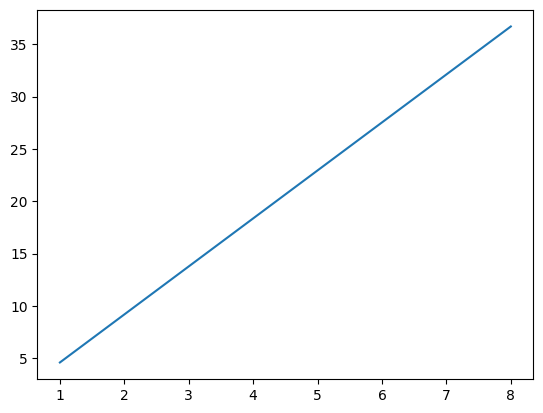

In [4]:

snr_list = []

for i in range(0, 8):
    slit = masks.RectSlit(
        size = (slit_width[i], slit_height)
        )

    payload = spectrometers.HyperspectralImager(
        sensor = sensor, foreoptic = foreoptic, slit = slit, diffractor = diffractor
        )

    radiance = luts.load("atmosphere/radiance_min")

    snr = payload.get_signal_to_noise(radiance = radiance, wavelength = target_wavelength)

    snr_list.append(snr)

display(snr_list)

slit = masks.RectSlit(
    size = (slit_width[i], slit_height)
    )

payload = spectrometers.HyperspectralImager(
    sensor = sensor, foreoptic = foreoptic, slit = slit, diffractor = diffractor
    )

bandpass = payload.get_bandpass(
    slit_width = slit_width, incident_angle = incident_angle, spectral_order = spectral_order
    )

display(bandpass)

plt.plot(slit_width, snr_list)
plt.show()



## Plots

In [6]:
slit_width_label = f"Slit Width"
bandpass_label = f"Full Width at Half Maximum"
data = {
    slit_width_label: slit_width,
    bandpass_label: bandpass,
}

df = pd.DataFrame.from_dict(data=data)
fig = plot.line(
    df=df,
    x=slit_width_label,
    y=[
        bandpass_label,
    ],
    title=None,
    dark=True,
)
fig.show()
display(df)

,Slit Width,Full Width at Half Maximum
0,1.0,5.87
1,2.0,11.74
2,3.0,17.61
3,4.0,23.48
4,5.0,29.35
5,6.0,35.22
6,7.0,41.09
7,8.0,46.96
